In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [2]:
#im skipping leap days currently in multiple places
import sys
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import seaborn
import random
import json
import pickle
import time
import copy

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [74]:
t = np.arange(0,100,1)

noise_1 = np.random.rand(100,)

load_growth = -0.05*np.power(t-50,2) 

system_load = (50*np.sin(0.5*t + 100) + 1000) + 30*noise_1 + load_growth


customer_load_droop = np.sin(0.5*t + 50) + 0.001*np.power(t-40,2)

noise_2 = np.random.rand(100,)

customer_load = (2*np.sin(0.9*t + 100)+ 5) + 2*noise_2 + customer_load_droop




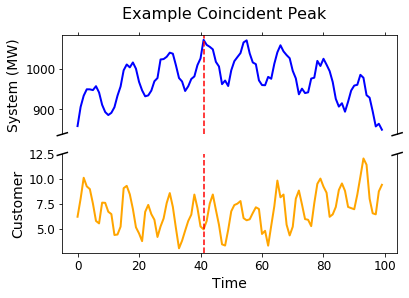

In [84]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)



ax.plot(system_load.T, lw=2, label="System", color="blue")
ax2.plot(customer_load, lw=2, label="Customer", color="orange")
ax.axvline(x=np.argmax(system_load), color="red", ls="--", label="Coincident Peak")
ax2.axvline(x=np.argmax(system_load), color="red", ls="--", label="Coincident Peak")

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax.xaxis.tick_top()
ax.tick_params(labeltop='off')
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

#f.legend(loc=3, fontsize=12)
f.suptitle("Example Coincident Peak", fontsize=16)
ax2.set_xlabel("Time", fontsize=14)
ax.set_ylabel("System (MW)", fontsize=14)
ax2.set_ylabel("Customer", fontsize=14)

ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
#plt.xticks(fontsize=12)
#plt.ylabel("MW", fontsize=14)
#plt.yticks(fontsize=12)
plt.show()

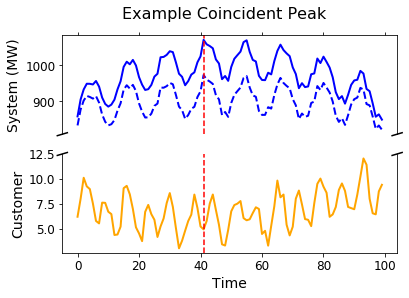

In [85]:
t = np.arange(0,100,1)


load_growth = -0.05*np.power(t-50,2) 
shaved_load = -0.02*np.power(t-50,2)

system_load = (50*np.sin(0.5*t + 100) + 1000) + 30*noise_1 + load_growth
system_shaved = (50*np.sin(0.5*t + 100) + 900) + 30*noise_1 + shaved_load




f, (ax, ax2) = plt.subplots(2, 1, sharex=True)



ax.plot(system_load.T, lw=2, label="System", color="blue")
ax2.plot(customer_load, lw=2, label="Customer", color="orange")
ax.plot(system_shaved, lw=2, color="blue", ls="--")
ax.axvline(x=np.argmax(system_load), color="red", ls="--", label="Coincident Peak")
ax2.axvline(x=np.argmax(system_load), color="red", ls="--", label="Coincident Peak")

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax.xaxis.tick_top()
ax.tick_params(labeltop='off')
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

#f.legend(loc=3, fontsize=12)
f.suptitle("Example Coincident Peak", fontsize=16)
ax2.set_xlabel("Time", fontsize=14)
ax.set_ylabel("System (MW)", fontsize=14)
ax2.set_ylabel("Customer", fontsize=14)

ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
#plt.xticks(fontsize=12)
#plt.ylabel("MW", fontsize=14)
#plt.yticks(fontsize=12)
plt.show()

In [80]:
savings

array([1686, 1605, 1526, 1449, 1374, 1301, 1230, 1161, 1094, 1029,  966,
        905,  846,  789,  734,  681,  630,  581,  534,  489,  446,  405,
        366,  329,  294,  261,  230,  201,  174,  149,  126,  105,   86,
         69,   54,   41,   30,   21,   14,    9,    6,    5,    6,    9,
         14,   21,   30,   41,   54,   69,   86,  105,  126,  149,  174,
        201,  230,  261,  294,  329,  366,  405,  446,  489,  534,  581,
        630,  681,  734,  789,  846,  905,  966, 1029, 1094, 1161, 1230,
       1301, 1374, 1449, 1526, 1605, 1686, 1769, 1854, 1941, 2030, 2121,
       2214, 2309, 2406, 2505, 2606, 2709, 2814, 2921, 3030, 3141, 3254,
       3369])

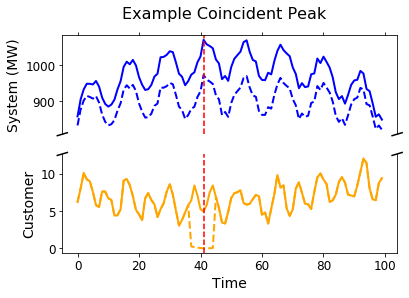

In [86]:
t = np.arange(0,100,1)

#customer_load_droop = np.sin(0.5*t + 50) + 0.001*np.power(t-40,2)
#noise_2 = np.random.rand(100,)
#customer_load = (2*np.sin(0.9*t + 100)+ 5) + 2*noise_2 + customer_load_droop

customer_load_droop = np.sin(0.5*t + 50) + 0.001*np.power(t-40,2)

customer_savings = np.argmax(system_load)


customer_load = (2*np.sin(0.9*t + 100)+ 5) + 2*noise_2 + customer_load_droop
customer_load_shaved = (2*np.sin(0.9*t + 100)+ 5) + 2*noise_2 + customer_load_droop

savings = 0.01*np.power(t-customer_savings, 2)

for i in range(8):
    customer_load_shaved[customer_savings - 4 + i] = savings[customer_savings - 5 + i]


f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

ax.plot(system_load.T, lw=2, label="System", color="blue")
ax2.plot(customer_load, lw=2, label="Customer", color="orange")
ax2.plot(customer_load_shaved, lw=2, label="Customer Curtailment", color="orange", ls="--")
ax.plot(system_shaved, lw=2, color="blue", ls="--")
ax.axvline(x=np.argmax(system_load), color="red", ls="--", label="Coincident Peak")
ax2.axvline(x=np.argmax(system_load), color="red", ls="--", label="Coincident Peak")

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax.xaxis.tick_top()
ax.tick_params(labeltop='off')
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

#f.legend(loc=3, fontsize=12)
f.suptitle("Example Coincident Peak", fontsize=16)
ax2.set_xlabel("Time", fontsize=14)
ax.set_ylabel("System (MW)", fontsize=14)
ax2.set_ylabel("Customer", fontsize=14)

ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
#plt.xticks(fontsize=12)
#plt.ylabel("MW", fontsize=14)
#plt.yticks(fontsize=12)
plt.show()

In [155]:
np.argmax(system_load)

54